# Projet ING2 Math Finance 23-24 

### @author: Ammar, Amine, Bilal, Illyas

# Modélisation du Bilan d'une Banque et des Réseaux Financiers

Ce projet vise à explorer les dynamiques complexes au sein des systèmes financiers, en particulier comment les institutions financières interagissent et sont affectées par les fluctuations du marché. À travers une série d'analyses et de simulations, nous cherchons à comprendre l'impact des relations de contrepartie et la propagation des défauts au sein d'un réseau de banques. En utilisant des modèles mathématiques et des simulations numériques, nous examinons les mécanismes de contagion financière et évaluons la résilience des institutions face à divers scénarios de stress.

## Objectifs 

- **Etude de la Cascade :** Analyser comment les défauts initiaux peuvent se propager à travers le réseau, entraînant une cascade de défaillances financières.
- **Evolution des Capitaux :** Comprendre comment le capital des banques évolue avec le temps, sous l'influence de fluctuations du marché modélisées par des mouvements browniens.
- **Impact de la Corrélation :** Examiner l'effet de la corrélation entre les mouvements des capitaux des différentes banques sur la stabilité du système financier.
- **Simulation de Loi Beta :** Explorer la distribution de la récupération des actifs en cas de défaut, en utilisant des variables aléatoires de loi Beta pour modéliser le taux de récupération.




In [407]:
# chargment des libraries
import numpy as np
import matplotlib.pyplot as plt
from math import *
from math import exp
from sympy import symbols, solve

### Etude de la Cascade.

#### Créer La fonction DOMINO

In [408]:
# Fonction Domino 

def Domino(capitaux_initiaux, expositions, seuil, taux_de_recuperation):
    capitaux = capitaux_initiaux[:]  # Copie pour éviter de modifier les capitaux initiaux
    banques_solubles = set(range(1, len(capitaux) + 1))
    banques_defaillantes = set()
    etapes = []
    
    while True:
        nouveaux_defauts = set()
        for i in banques_solubles:
            if capitaux[i - 1] < seuil:
                nouveaux_defauts.add(i)
        
        if not nouveaux_defauts:
            break
        
        for d in nouveaux_defauts:
            banques_solubles.remove(d)
            banques_defaillantes.add(d)
        
        for i in banques_solubles:
            for d in nouveaux_defauts:
                capitaux[i - 1] -= (1 - taux_de_recuperation) * expositions[i - 1][d - 1]
        
        etapes.append({
            "BanquesSolubles": list(banques_solubles),
            "BanquesDefaillantes": list(banques_defaillantes),
            "NouveauxDefauts": list(nouveaux_defauts),
            "CapitauxSuivant": capitaux[:]
        })
    
    return etapes


#### Fonction pour calculer Impact de défaut

In [409]:
# Fonction pour calculer l'impact de défaut

def calculer_impact_defaut(capital, expositions,seuil,taux_de_recuperation):
    # Récupérer les banques défaillantes à la dernière étape
    etapes = Domino(capital, expositions,seuil,taux_de_recuperation)
    derniere_etape = etapes[-1]
    defaut_bq = derniere_etape["BanquesDefaillantes"]
    solubles_bq = derniere_etape["BanquesSolubles"]

    # Somme des capitaux initiaux des banques défaillantes
    impact_defaut_total = sum(capital[i-1] for i in defaut_bq)
    for i in solubles_bq:
        for d in defaut_bq:
            impact_defaut_total -= (1 - taux_de_recuperation) * expositions[i-1][d-1]


    return impact_defaut_total, defaut_bq

#### Paramètres 

In [410]:
expositions = [[0, 3, 0, 0, 6], [3, 0, 0, 0, 0], [3, 3, 0, 0, 0], [2, 2, 2, 0, 2], [0, 2, 3, 3, 0]]  # Matrice de contrepartie
seuil = 10
taux_de_recuperation = 0.05

##### Jeu de données 0

In [411]:
# Paramètres de la simulation
capitaux_initiaux = [14, 9, 8, 13, 15]

# Exécution de la fonction Domino améliorée
etapes = Domino(capitaux_initiaux, expositions, seuil, taux_de_recuperation)

# Affichage des résultats de chaque étape
for indice, etape in enumerate(etapes, start=1):
    print(f"Étape {indice}:")
    print(f"  Banques Solubles: {etape['BanquesSolubles']}")
    print(f"  Banques Défaillantes: {etape['BanquesDefaillantes']}")
    print(f"  Nouveaux Défauts: {etape['NouveauxDefauts']}")
    print(f"  Capitaux Suivant: {etape['CapitauxSuivant']}\n")

# Utilisation de la fonction pour calculer l'impact du défaut à la dernière étape
impact_defaut_total, defaut_banques = calculer_impact_defaut(capitaux_initiaux, expositions,seuil,taux_de_recuperation)
print("Impact du défaut à la dernière étape:", impact_defaut_total)
print("Banques en défaut à la dernière étape:", defaut_banques)

Étape 1:
  Banques Solubles: [1, 4, 5]
  Banques Défaillantes: [2, 3]
  Nouveaux Défauts: [2, 3]
  Capitaux Suivant: [11.15, 9, 8, 9.2, 10.25]

Étape 2:
  Banques Solubles: [1, 5]
  Banques Défaillantes: [2, 3, 4]
  Nouveaux Défauts: [4]
  Capitaux Suivant: [11.15, 9, 8, 9.2, 7.4]

Étape 3:
  Banques Solubles: [1]
  Banques Défaillantes: [2, 3, 4, 5]
  Nouveaux Défauts: [5]
  Capitaux Suivant: [5.450000000000001, 9, 8, 9.2, 7.4]

Étape 4:
  Banques Solubles: []
  Banques Défaillantes: [1, 2, 3, 4, 5]
  Nouveaux Défauts: [1]
  Capitaux Suivant: [5.450000000000001, 9, 8, 9.2, 7.4]

Impact du défaut à la dernière étape: 59
Banques en défaut à la dernière étape: [1, 2, 3, 4, 5]


##### Jeu de données 1

In [412]:
# Paramètres de la simulation
capitaux_initiaux = [12, 9, 11, 13, 12]

# Exécution de la fonction domino améliorée
etapes = Domino(capitaux_initiaux, expositions, seuil, taux_de_recuperation)

# Affichage des résultats de chaque étape
for indice, etape in enumerate(etapes, start=1):
    print(f"Étape {indice }:")
    print(f"  Banques Solubles: {etape['BanquesSolubles']}")
    print(f"  Banques Défaillantes: {etape['BanquesDefaillantes']}")
    print(f"  Nouveaux Défauts: {etape['NouveauxDefauts']}")
    print(f"  Capitaux Suivant: {etape['CapitauxSuivant']}\n")



# Utilisation de la fonction pour calculer l'impact du défaut à la dernière étape
impact_defaut_total, defaut_banques = calculer_impact_defaut(capitaux_initiaux, expositions,seuil,taux_de_recuperation)
print("Impact du défaut à la dernière étape:", impact_defaut_total)
print("Banques en défaut à la dernière étape:", defaut_banques)

Étape 1:
  Banques Solubles: [1, 3, 4, 5]
  Banques Défaillantes: [2]
  Nouveaux Défauts: [2]
  Capitaux Suivant: [9.15, 9, 8.15, 11.1, 10.1]

Étape 2:
  Banques Solubles: [4, 5]
  Banques Défaillantes: [1, 2, 3]
  Nouveaux Défauts: [1, 3]
  Capitaux Suivant: [9.15, 9, 8.15, 7.299999999999999, 7.25]

Étape 3:
  Banques Solubles: []
  Banques Défaillantes: [1, 2, 3, 4, 5]
  Nouveaux Défauts: [4, 5]
  Capitaux Suivant: [9.15, 9, 8.15, 7.299999999999999, 7.25]

Impact du défaut à la dernière étape: 57
Banques en défaut à la dernière étape: [1, 2, 3, 4, 5]


##### Jeu de données 2

In [413]:
# Paramètres de la simulation
capitaux_initiaux = [15, 9, 8, 18, 12]

# Exécution de la fonction domino améliorée
etapes = Domino(capitaux_initiaux, expositions, seuil, taux_de_recuperation)

# Affichage des résultats de chaque étape
for indice, etape in enumerate(etapes, start=1):
    print(f"Étape {indice }:")
    print(f"  Banques Solubles: {etape['BanquesSolubles']}")
    print(f"  Banques Défaillantes: {etape['BanquesDefaillantes']}")
    print(f"  Nouveaux Défauts: {etape['NouveauxDefauts']}")
    print(f"  Capitaux Suivant: {etape['CapitauxSuivant']}\n")



# Utilisation de la fonction pour calculer l'impact du défaut à la dernière étape
impact_defaut_total, defaut_banques = calculer_impact_defaut(capitaux_initiaux, expositions,seuil,taux_de_recuperation)
print("Impact du défaut à la dernière étape:", impact_defaut_total)
print("Banques en défaut à la dernière étape:", defaut_banques)

Étape 1:
  Banques Solubles: [1, 4, 5]
  Banques Défaillantes: [2, 3]
  Nouveaux Défauts: [2, 3]
  Capitaux Suivant: [12.15, 9, 8, 14.200000000000001, 7.25]

Étape 2:
  Banques Solubles: [1, 4]
  Banques Défaillantes: [2, 3, 5]
  Nouveaux Défauts: [5]
  Capitaux Suivant: [6.450000000000001, 9, 8, 12.3, 7.25]

Étape 3:
  Banques Solubles: [4]
  Banques Défaillantes: [1, 2, 3, 5]
  Nouveaux Défauts: [1]
  Capitaux Suivant: [6.450000000000001, 9, 8, 10.4, 7.25]

Impact du défaut à la dernière étape: 36.400000000000006
Banques en défaut à la dernière étape: [1, 2, 3, 5]


##### Jeu de données 3

In [414]:
# Paramètres de la simulation
capitaux_initiaux = [14,15,11,9,12,12,13,14,15,12]
expositions = [[0, 3, 0, 0, 6,0,3,2,4,0], [3, 0, 0, 0, 0,6,5,0,4,2], [3, 3, 0, 0, 0,6,5,3,2,1], [2, 2, 2, 0, 2,0,4,6,0], [0, 2, 3, 3, 0,5,0,2,3,0],[0,0,6,0,2,0,0,3,0,0],[3,0,4,0,0,0,0,0,0,6],[0,3,0,4,0,6,0,0,3,1],[2,0,0,3,0,4,6,0,0,3],[0,2,0,3,0,2,0,2,3,0]]

# Exécution de la fonction domino améliorée
etapes = Domino(capitaux_initiaux, expositions, seuil, taux_de_recuperation)

# Affichage des résultats de chaque étape
for indice, etape in enumerate(etapes, start=1):
    print(f"Étape {indice }:")
    print(f"  Banques Solubles: {etape['BanquesSolubles']}")
    print(f"  Banques Défaillantes: {etape['BanquesDefaillantes']}")
    print(f"  Nouveaux Défauts: {etape['NouveauxDefauts']}")
    print(f"  Capitaux Suivant: {etape['CapitauxSuivant']}\n")



# Utilisation de la fonction pour calculer l'impact du défaut à la dernière étape
impact_defaut_total, defaut_banques = calculer_impact_defaut(capitaux_initiaux, expositions,seuil,taux_de_recuperation)
print("Impact du défaut à la dernière étape:", impact_defaut_total)
print("Banques en défaut à la dernière étape:", defaut_banques)

Étape 1:
  Banques Solubles: [1, 2, 3, 5, 6, 7, 8, 9, 10]
  Banques Défaillantes: [4]
  Nouveaux Défauts: [4]
  Capitaux Suivant: [14.0, 15.0, 11.0, 9, 9.15, 12.0, 13.0, 10.2, 12.15, 9.15]

Étape 2:
  Banques Solubles: [1, 2, 3, 6, 7, 8, 9]
  Banques Défaillantes: [10, 4, 5]
  Nouveaux Défauts: [10, 5]
  Capitaux Suivant: [8.3, 13.1, 10.05, 9, 9.15, 10.1, 7.300000000000001, 9.25, 9.3, 9.15]

Étape 3:
  Banques Solubles: [2, 3, 6]
  Banques Défaillantes: [1, 4, 5, 7, 8, 9, 10]
  Nouveaux Défauts: [8, 1, 9, 7]
  Capitaux Suivant: [8.3, 1.7000000000000002, -2.2999999999999985, 9, 9.15, 7.25, 7.300000000000001, 9.25, 9.3, 9.15]

Étape 4:
  Banques Solubles: []
  Banques Défaillantes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  Nouveaux Défauts: [2, 3, 6]
  Capitaux Suivant: [8.3, 1.7000000000000002, -2.2999999999999985, 9, 9.15, 7.25, 7.300000000000001, 9.25, 9.3, 9.15]

Impact du défaut à la dernière étape: 127
Banques en défaut à la dernière étape: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


##### Jeu de données 3 bis

In [415]:
# Paramètres de la simulation
capitaux_initiaux = [20,9,20,9,25,20,12,14,15,13]
expositions = [[0, 3, 0, 0, 6,0,3,2,4,0], [3, 0, 0, 0, 0,6,5,0,4,2], [3, 3, 0, 0, 0,6,5,3,2,1], [2, 2, 2, 0, 2,0,4,6,0], [0, 2, 3, 3, 0,5,0,2,3,0],[0,0,6,0,2,0,0,3,0,0],[3,0,4,0,0,0,0,0,0,6],[0,3,0,4,0,6,0,0,3,1],[2,0,0,3,0,4,6,0,0,3],[0,2,0,3,0,2,0,2,3,0]]


# Exécution de la fonction domino améliorée
etapes = Domino(capitaux_initiaux, expositions, seuil, taux_de_recuperation)

# Affichage des résultats de chaque étape
for indice, etape in enumerate(etapes, start=1):
    print(f"Étape {indice }:")
    print(f"  Banques Solubles: {etape['BanquesSolubles']}")
    print(f"  Banques Défaillantes: {etape['BanquesDefaillantes']}")
    print(f"  Nouveaux Défauts: {etape['NouveauxDefauts']}")
    print(f"  Capitaux Suivant: {etape['CapitauxSuivant']}\n")



# Utilisation de la fonction pour calculer l'impact du défaut à la dernière étape
impact_defaut_total, defaut_banques = calculer_impact_defaut(capitaux_initiaux, expositions,seuil,taux_de_recuperation)
print("Impact du défaut à la dernière étape:", impact_defaut_total)
print("Banques en défaut à la dernière étape:", defaut_banques)



Étape 1:
  Banques Solubles: [1, 3, 5, 6, 7, 8, 9, 10]
  Banques Défaillantes: [2, 4]
  Nouveaux Défauts: [2, 4]
  Capitaux Suivant: [17.15, 9, 17.15, 9, 20.25, 20.0, 12.0, 7.3500000000000005, 12.15, 8.25]

Étape 2:
  Banques Solubles: [1, 3, 5, 6, 7, 9]
  Banques Défaillantes: [8, 2, 10, 4]
  Nouveaux Défauts: [8, 10]
  Capitaux Suivant: [15.249999999999998, 9, 13.35, 9, 18.35, 17.15, 6.300000000000001, 7.3500000000000005, 9.3, 8.25]

Étape 3:
  Banques Solubles: [1, 3, 5, 6]
  Banques Défaillantes: [2, 4, 7, 8, 9, 10]
  Nouveaux Défauts: [9, 7]
  Capitaux Suivant: [8.6, 9, 6.699999999999999, 9, 15.500000000000002, 17.15, 6.300000000000001, 7.3500000000000005, 9.3, 8.25]

Étape 4:
  Banques Solubles: [5, 6]
  Banques Défaillantes: [1, 2, 3, 4, 7, 8, 9, 10]
  Nouveaux Défauts: [1, 3]
  Capitaux Suivant: [8.6, 9, 6.699999999999999, 9, 12.650000000000002, 11.45, 6.300000000000001, 7.3500000000000005, 9.3, 8.25]

Impact du défaut à la dernière étape: 91.10000000000001
Banques en défaut à 

### Etude de la Cascade à l'aide de donnée simulées par Monte Carlo.

In [416]:
# simuler l'évolution des capitaux des banques
def simuler_evolution_capitaux(mu, sigma, lambda_, capitaux_initiaux, n=12, T=1):
    dt = T / n
    X = np.zeros((len(capitaux_initiaux), n+1))
    X[:, 0] = capitaux_initiaux  # Initialisation des capitaux
    for t in range(1, n+1):
        dW = np.random.normal(0, np.sqrt(dt), len(capitaux_initiaux))
        X[:, t] = X[:, t-1] + lambda_ * (mu - X[:, t-1]) * dt + sigma * dW
    return X

In [417]:
# Redefinir Domino pour qu'il renvoie a la sortie de listes 
def Domino1(capitaux1, expositions, seuil, taux_de_recuperation):
    capitaux = capitaux1.copy() 
    banques_solubles = set(range(1, len(capitaux) + 1))
    banques_defaillantes = set()

    while True:
        nouveaux_defauts = set()
        for i in banques_solubles:
            if capitaux[i - 1] < seuil:
                nouveaux_defauts.add(i)

        if not nouveaux_defauts:
            break

        for d in nouveaux_defauts:
            banques_solubles.remove(d)
            banques_defaillantes.add(d)

        for i in banques_solubles:
            for d in nouveaux_defauts:
                capitaux[i - 1] -= (1 - taux_de_recuperation) * expositions[i - 1][d - 1]

    return list(banques_solubles), list(banques_defaillantes)

In [418]:
# Para
mu = 15
sigma = 8
lambda_ = 20
C = 10
expositions = np.array([[0, 3, 0, 0, 6], [3, 0, 0, 0, 0], [3, 3, 0, 0, 0], [2, 2, 2, 0, 2], [0, 2, 3, 3, 0]])
taux_de_recuperation = 0.05


jeux_de_donnees = [
    [12, 9, 11, 13, 12],
    [15, 9, 8, 18, 12],
    [14, 9, 8, 13, 15]
]

In [419]:
# Simulation et application de l'effet Domino

for i, capitaux_initiaux in enumerate(jeux_de_donnees, start=1):
    X = simuler_evolution_capitaux(mu, sigma, lambda_, capitaux_initiaux)
    solubles, defaillantes = Domino1(X[:, -1], expositions, C, taux_de_recuperation)
    print(f"Jeu de données {i}: Banques solubles: {solubles}, Banques défaillantes: {defaillantes}")


Jeu de données 1: Banques solubles: [1, 2, 3, 4, 5], Banques défaillantes: []
Jeu de données 2: Banques solubles: [1, 2, 3, 4, 5], Banques défaillantes: []
Jeu de données 3: Banques solubles: [1, 2, 3, 4, 5], Banques défaillantes: []


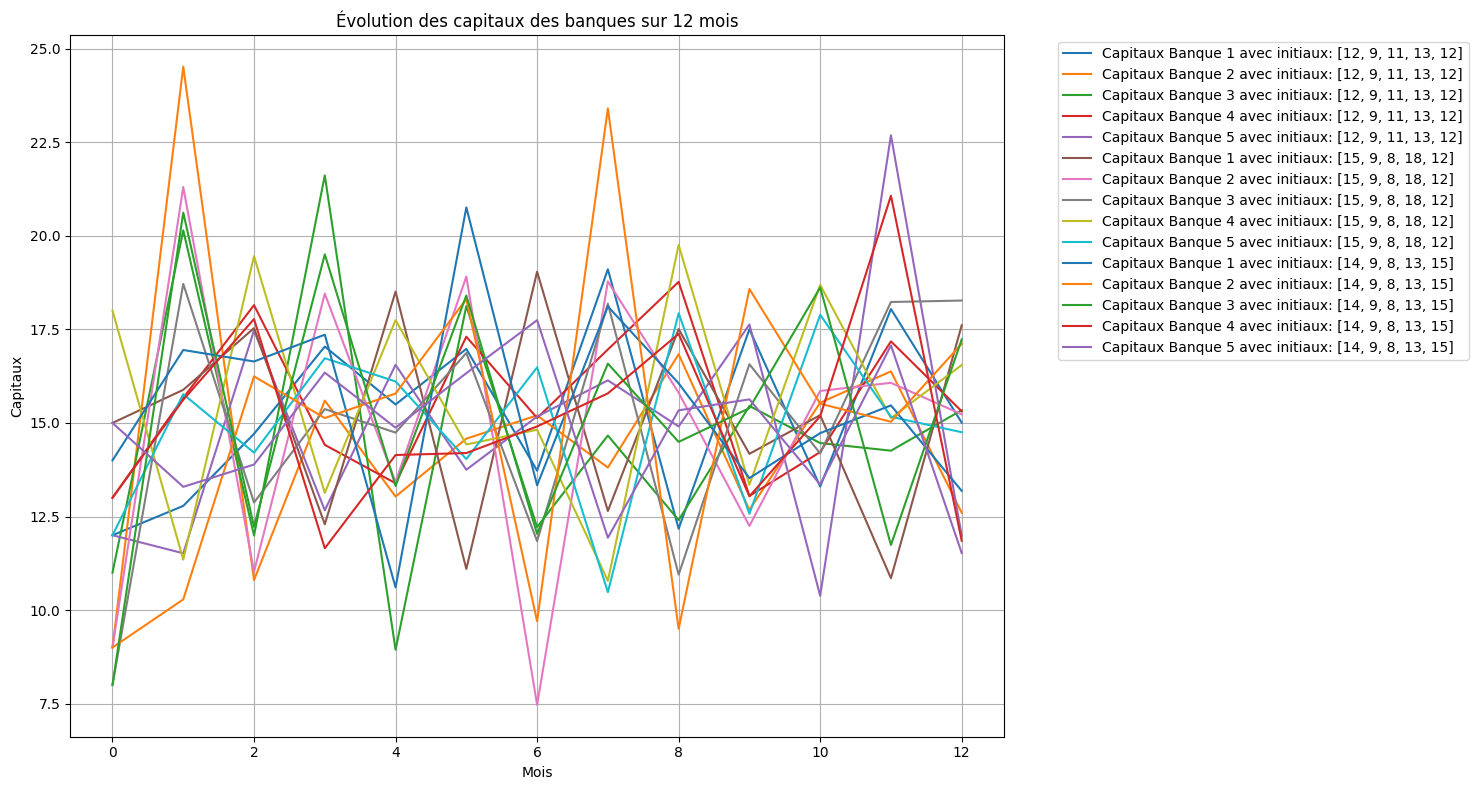

In [420]:
# Visualisation de l'évolution des capitaux

plt.figure(figsize=(15, 8))
temps = np.linspace(0, 12, 13)  # De 0 à 12 mois
for capitaux_initiaux in jeux_de_donnees:
    X = simuler_evolution_capitaux(mu, sigma, lambda_, capitaux_initiaux)
    for banque_idx in range(X.shape[0]):
        plt.plot(temps, X[banque_idx, :], label=f'Capitaux Banque {banque_idx+1} avec initiaux: {capitaux_initiaux}')
plt.title("Évolution des capitaux des banques sur 12 mois")
plt.xlabel("Mois")
plt.ylabel("Capitaux")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [421]:
def estimer_probabilites_insolvabilite(Nmc, seuil, mu, sigma, lambda_, n, dt, expositions, taux_de_recuperation):
    resultats = np.zeros(6)  # De 0 à 5 banques insolvables
    for _ in range(Nmc):
        # Simuler l'évolution des capitaux pour toutes les banques
        capitaux_finaux = simuler_evolution_capitaux(mu, sigma, lambda_, [mu]*5, n, dt)[:, -1]
        # Appliquer la fonction Domino pour identifier les banques solubles et défaillantes
        solubles, defaillantes = Domino1(capitaux_finaux, expositions, seuil, taux_de_recuperation)
        # Incrémenter le compteur pour le nombre de banques défaillantes observées
        resultats[len(defaillantes)] += 1
    # Calculer les probabilités en divisant le nombre d'occurrences par le nombre total de simulations
    probabilites = resultats / Nmc
    return probabilites[1:]  # Exclure le cas de 0 banque insolvable pour l'affichage

Nmc = 100000  

# Estimation des probabilités
probabilites = estimer_probabilites_insolvabilite(Nmc, C, mu, sigma, lambda_, 12, 1/12, expositions, taux_de_recuperation)

# Afficher les probabilités
for i, proba in enumerate(probabilites, start=1):
    print(f"Probabilité que {i} banque(s) soit(ent) insolvable(s): {proba:.4f}")

Probabilité que 1 banque(s) soit(ent) insolvable(s): 0.0002
Probabilité que 2 banque(s) soit(ent) insolvable(s): 0.0000
Probabilité que 3 banque(s) soit(ent) insolvable(s): 0.0000
Probabilité que 4 banque(s) soit(ent) insolvable(s): 0.0000
Probabilité que 5 banque(s) soit(ent) insolvable(s): 0.0000


### Evolution dépendante de N capitaux.

In [422]:
## Paramètres
mu = 15
sigma = 8
lamda = 20
expositions = [[0, 3, 0, 0, 6], [3, 0, 0, 0, 0], [3, 3, 0, 0, 0], [2, 2, 2, 0, 2], [0, 2, 3, 3, 0]]
seuil = 10
taux_de_recuperation = 0.05
T = 1
N = 12
dt = T / N

N_banques = len(expositions)

Nmc = 1000

Simulation des capitaux des banques pendant 12 mois avec une matrice d'exposition définie

Matrice de Covariance :

[[1.         0.00635076 0.03300141 0.01143461 0.02806303]
 [0.00635076 1.         0.06342404 0.01400784 0.0552719 ]
 [0.03300141 0.06342404 1.         0.03381291 0.01964478]
 [0.01143461 0.01400784 0.03381291 1.         0.0014715 ]
 [0.02806303 0.0552719  0.01964478 0.0014715  1.        ]]

Matrice triangulaire inférieure M obtenue par décomposition de Cholesky :

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 6.35076032e-03  9.99979834e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 3.30014116e-02  6.32157269e-02  9.97454099e-01  0.00000000e+00
   0.00000000e+00]
 [ 1.14346069e-02  1.39355033e-02  3.26377019e-02  9.99304674e-01
   0.00000000e+00]
 [ 2.80630266e-02  5.50947862e-02  1.52746961e-02 -1.15776479e-04
   9.97969790e-01]]

Vecteur des capitaux après simulation Monte Carlo :
[12.647384220935734, 13.77667275708491

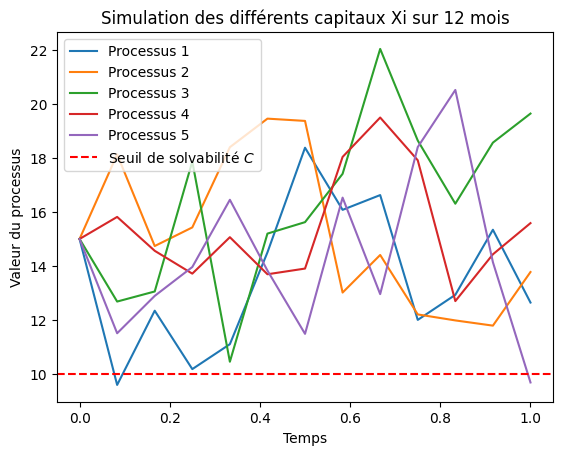

Voici les probabilités pour les différentes banques avec Nmc =  1000

Probabilité de défaut de la banque  1  :  0.036

Probabilité de défaut de la banque  2  :  0.025

Probabilité de défaut de la banque  3  :  0.034

Probabilité de défaut de la banque  4  :  0.038

Probabilité de défaut de la banque  5  :  0.031



In [424]:
## Matrice de Cholesky

# Construction des vecteurs de mouvements browniens indépendants
def construction_brownian():

    B = np.zeros((N_banques, N+1))
    for i in range(N_banques):
        B[i] = np.random.normal(0, np.sqrt(dt), N+1)

    # Construction de la matrice de covariance :
    covariance_matrix = np.eye(N_banques) # remplir la diagonale avec des 1
    for i in range(N_banques):
        for j in range(i+1,N_banques):
            covariance_matrix[i,j] = abs(np.cov(B[i], B[j])[0, 1])

    # Symétriser la matrice de covariance et ajuster la diagonale
    covariance_matrix = covariance_matrix + covariance_matrix.T - np.diag(covariance_matrix.diagonal())

    # Décomposition de Cholesky
    M = np.linalg.cholesky(covariance_matrix)


    return B,M,covariance_matrix

## Simulation du vecteur Capital :

def SimulationMonteCarlo(B,M):

    # Initialisation de X vecteur capital
    X = np.zeros((N_banques, N+1))

    for i in range(N_banques):
        X[i][0] = mu

    # Déroulement :
    for k in range(N):
        for i in range(N_banques):
            X[i, k+1] = exp(-lamda * dt) * X[i, k] + mu * (1 - exp(-lamda * dt))
            for j in range(N_banques):
                X[i, k+1] += sigma * M[i, j] * B[j, k]

    return X

# Pour récupérer les dernières valeurs :

def recup_XT(tableau):
    XT = []
    for i in range(len(tableau)):
        XT.append(tableau[i,-1])
    return XT



## Calcul des probabilités de ruine :

def calcul_probas(n):
    compteur = 0
    for _ in range(Nmc):
        B,M,_ = construction_brownian()
        XT = recup_XT(SimulationMonteCarlo(B,M))
        #print(XT)
        _,Banques_defaut = calculer_impact_defaut(XT,expositions,seuil,taux_de_recuperation)
        if n in Banques_defaut:
            compteur+=1
    return compteur / Nmc





##Fonction Domino

def Domino(capitaux1, expositions, seuil, taux_de_recuperation):

    capitaux = capitaux1[:]

    banques_solubles = set(range(1,len(capitaux)+1))
    banques_defaillantes = set()
    etapes = []


    while True:
        nouveaux_defauts = set()
        for i in banques_solubles:
            if capitaux[i-1] < seuil:
                nouveaux_defauts.add(i)

        if not nouveaux_defauts:
            break


        for d in nouveaux_defauts:
            banques_solubles.remove(d)
            banques_defaillantes.add(d)

        for i in banques_solubles:
            for d in nouveaux_defauts:
                capitaux[i-1] -= (1 - taux_de_recuperation) * expositions[i-1][d-1]


        etapes.append({
            "BanquesSolubles": list(banques_solubles),
            "BanquesDefaillantes": list(banques_defaillantes),
            "NouveauxDefauts": list(nouveaux_defauts),
            "CapitauxSuivant": capitaux[:]
        })

    return etapes


## Fonction pour calculer l'impact de défaut

def calculer_impact_defaut(capital, expositions,seuil,taux_de_recuperation):
    # Récupérer les banques défaillantes à la dernière étape
    etapes = Domino(capital, expositions,seuil,taux_de_recuperation)
    if not etapes:
        return 0,[]
    derniere_etape = etapes[-1]
    defaut_bq = derniere_etape["BanquesDefaillantes"]
    solubles_bq = derniere_etape["BanquesSolubles"]

    # Somme des capitaux initiaux des banques défaillantes
    impact_defaut_total = sum(capital[i-1] for i in defaut_bq)
    for i in solubles_bq:
        for d in defaut_bq:
            impact_defaut_total -= (1 - taux_de_recuperation) * expositions[i-1][d-1]


    return impact_defaut_total, defaut_bq



# Affichage des matrices :

print("Simulation des capitaux des banques pendant 12 mois avec une matrice d'exposition définie")
print("")
BT,M_cholesky,Cov_M = construction_brownian()
print("Matrice de Covariance :")
print("")
print(Cov_M)
print("")
print("Matrice triangulaire inférieure M obtenue par décomposition de Cholesky :")
print("")
print(M_cholesky)
print("")

# Affichage du vecteur :

X = SimulationMonteCarlo(BT,M_cholesky)
XT = recup_XT(X)
print("Vecteur des capitaux après simulation Monte Carlo :")
print(XT)
print("")

# Affichage du graphe :

t = np.linspace(0, T, N+1)
for i in range(N_banques):
    plt.plot(t, X[i], label=f"Processus {i+1}")

plt.axhline(y=seuil, color='r', linestyle='--', label='Seuil de solvabilité $C$')
plt.xlabel('Temps')
plt.ylabel('Valeur du processus')
plt.title('Simulation des différents capitaux Xi sur 12 mois')
plt.legend()
plt.show()


# Affichage des probabilités

print("Voici les probabilités pour les différentes banques avec Nmc = ",Nmc)
print("")

for b in range(1,N_banques+1):
    print("Probabilité de défaut de la banque ",b," : ",calcul_probas(b))
    print("")

### Simulation de loi Beta

Solution alpha et beta pour Esperance = 5% et Variance = 4% :

Valeur de alpha : 0.00789473684210526
Valeur de beta  : 0.150000000000000
Solution alpha et beta pour Esperance = 5% et Variance = 4% :

Valeur de alpha : 0.00789473684210526
Valeur de beta  : 0.150000000000000


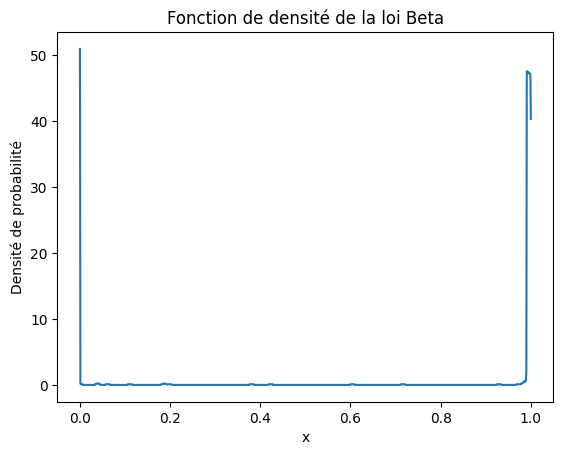

0

In [ ]:
# Simuler la variable aléatoire Beta
def simulate_beta(alpha1, beta1, size=1):
    u = np.random.uniform(0, 1, size)
    v = np.random.uniform(0, 1, size)
    x = (u**(1/alpha1) * v**(1/beta1)) / (u**(1/alpha1) * v**(1/beta1) + (1-u)**(1/alpha1) * (1-v)**(1/beta1))
    return x

# Para
alpha1 = 0.5
beta1 = 0.5

# Simulation
sample_size1 = 1000
beta_sample1 = simulate_beta(alpha1, beta1, sample_size1)

##  Calculer α et β pour l'espérance 5% et d'écart-type autour de 20%


# Définition des symboles
a, b = symbols('a b')

# Définition des équations
eq1 = 0.05 - (a / (a + b))
eq2 = 0.04 - (a * b) / ((a + b)**2) * (a + b + 1)

# Résolution du système d'équations
solution = solve((eq1, eq2), (a, b))

alpha,beta = solution[0]

alpha_cond = abs(alpha)
beta_cond = abs(beta)

print("Solution alpha et beta pour Esperance = 5% et Variance = 4% :")
print("")
print("Valeur de alpha :",alpha_cond)
print("Valeur de beta  :",beta_cond)

##  Tracer la fonction de densité empirique pour chaque cas.

Nmc = 1000

depart = 0
delta=0.01  # Réduit la largeur du delta pour un tracé plus précis

def densite(X, depart, delta, Nmc):
    N = 1000
    x = np.linspace(0, 1, N)
    P = np.zeros(N)
    for i in range(N):
        C = 0
        for j in range(Nmc):
            if j < len(X) and X[j] >= x[i] and X[j] < x[i]+delta:
                C += 1
        P[i] = C / (Nmc * delta)
    plt.figure()
    plt.plot(x, P)
    plt.xlabel('x')
    plt.ylabel('Densité de probabilité')
    plt.title('Fonction de densité de la loi Beta')
    plt.show()
    return 0


print("Solution alpha et beta pour Esperance = 5% et Variance = 4% :")
print("")
print("Valeur de alpha :",alpha_cond)
print("Valeur de beta  :",beta_cond)

# affichage :

X1 = simulate_beta(alpha1,beta1, size=sample_size1)
X2 = simulate_beta(alpha_cond,beta_cond, size=sample_size1)

#densite(X1,depart,delta,Nmc)

densite(X2,depart,delta,Nmc)